In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
df = pd.read_excel("Amazon_Combined_Data.xlsx")
display(df.head())

,Product Category,Product Description,Price(Dollar),Number of reviews,Shipment,Order Date
0,Audio Video,"Upgraded, Anker Soundcore Bluetooth Speaker wi...",27,82773,Ships to Bangladesh,2019-01-03
1,Audio Video,Twelve South AirFly Pro Bluetooth Wireless Aud...,54,5121,Ships to Bangladesh,2019-01-04
2,Audio Video,iOttie Easy One Touch 5 Dashboard & Windshield...,24,126957,Ships to Bangladesh,2019-01-04
3,Audio Video,"INIU Wireless Charger, 15W Fast Wireless Charg...",15,18837,Ships to Bangladesh,2019-01-04
4,Audio Video,JBL Flip 4 Waterproof Portable Bluetooth Speak...,78,13141,Ships to Bangladesh,2019-01-05


In [17]:
df.columns = df.columns.str.strip()
df.columns

Index(['Product Category', 'Product Description', 'Price(Dollar)',
       'Number of  reviews', 'Shipment', 'Order Date'],
      dtype='object')

Basic Checks for Info, Missing Values and Data Types

In [18]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89082 entries, 0 to 89081
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Category     89082 non-null  object        
 1   Product Description  89082 non-null  object        
 2   Price(Dollar)        89082 non-null  int64         
 3   Number of  reviews   89082 non-null  int64         
 4   Shipment             89082 non-null  object        
 5   Order Date           89082 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.1+ MB


,Price(Dollar),Number of reviews,Order Date
count,89082.000000,89082.000000,89082
mean,94.527604,657.150592,2021-04-14 08:41:09.347342848
min,0.000000,1.000000,2019-01-03 00:00:00
25%,24.000000,8.000000,2020-04-30 00:00:00
50%,46.000000,44.000000,2021-06-05 00:00:00
75%,86.000000,230.000000,2022-04-16 00:00:00
max,16775.000000,406442.000000,2022-12-31 00:00:00
std,280.455093,4973.036959,NaN


TOP 10 PERFORMING PRODUCT CATEGORIES BY SALES & REVIEW

In [22]:
df['Sales'] = df['Number of  reviews'] * df['Price(Dollar)']

top_categories = df.groupby('Product Category')[['Sales','Number of  reviews']].sum().sort_values('Sales', ascending=False)

print(top_categories.head(10))

                           Sales  Number of  reviews
Product Category                                    
Men Shoes             1132937759            11001863
Camera                 974474593             6525087
Men Clothes            710336263            18922701
Laptop                 358055858              382909
Mobile & Accessories   350890621             9835939
Toys                   187467515             7266266
Car Accessories        125509065             2688581
Audio Video            103808106             1916943


1. Plotting Top Categories by Sales
2. Plotting Top Categories by Number of Reviews

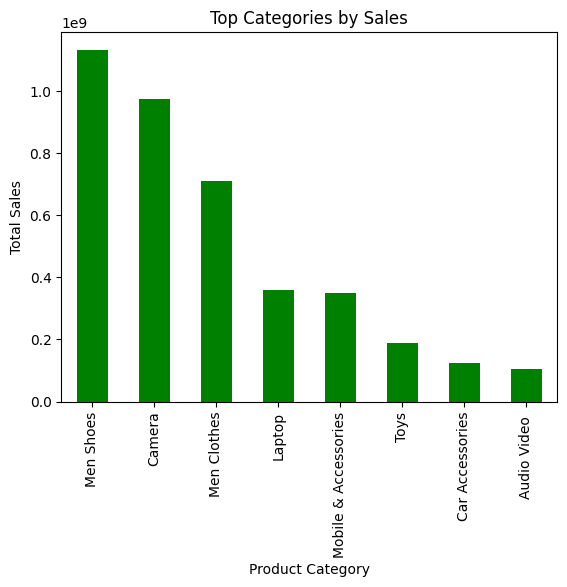

In [23]:
top_categories['Sales'].plot(kind="bar", color ="green", title= "Top Categories by Sales")
plt.ylabel('Total Sales')
plt.show()

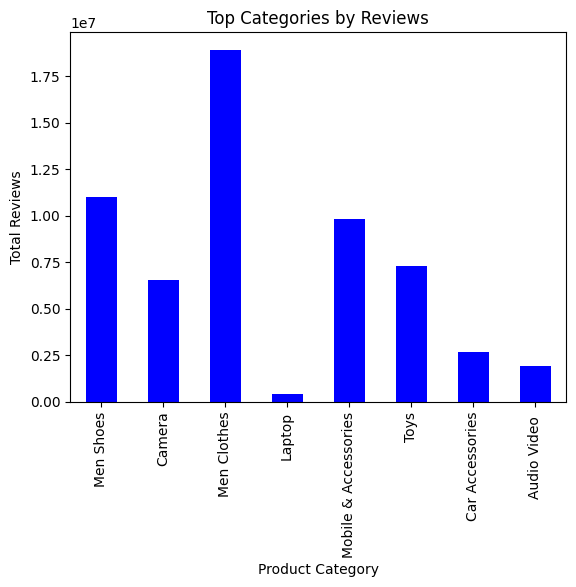

In [25]:
top_categories['Number of  reviews'].plot(kind='bar', color='blue', title='Top Categories by Reviews')
plt.ylabel('Total Reviews')
plt.show()

Price vs Reviews Analysis

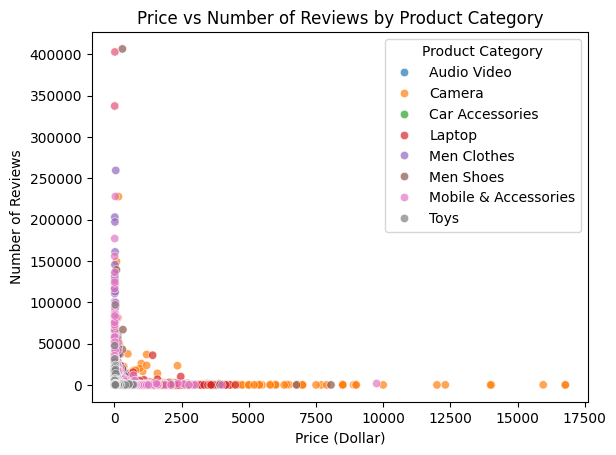

In [26]:
sns.scatterplot(
    data=df,
    x='Price(Dollar)',
    y='Number of  reviews',
    hue='Product Category',
    alpha=0.7
)
plt.title('Price vs Number of Reviews by Product Category')
plt.xlabel('Price (Dollar)')
plt.ylabel('Number of Reviews')
plt.show()

Monthly Orders Trend


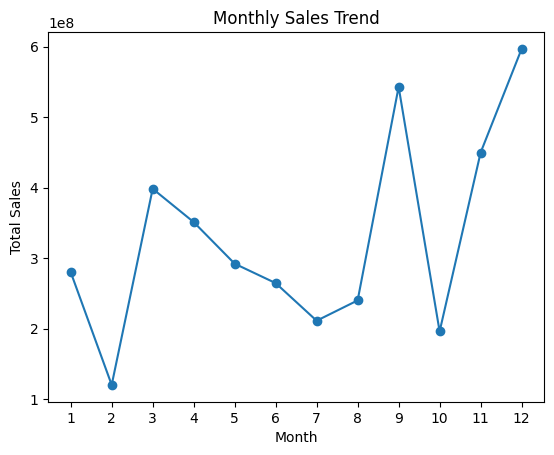

In [27]:
df['Sales'] = df['Price(Dollar)'] * df['Number of  reviews']


if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Month'] = df['Order Date'].dt.month


    monthly_orders = df.groupby('Month')['Sales'].sum()

    monthly_orders.plot(kind='line', marker='o', title='Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(range(1,13))
    plt.show()